In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)

In [22]:
df
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')] 

df_da = df_da.dropna(subset=['salary_year_avg'])


<Axes: >

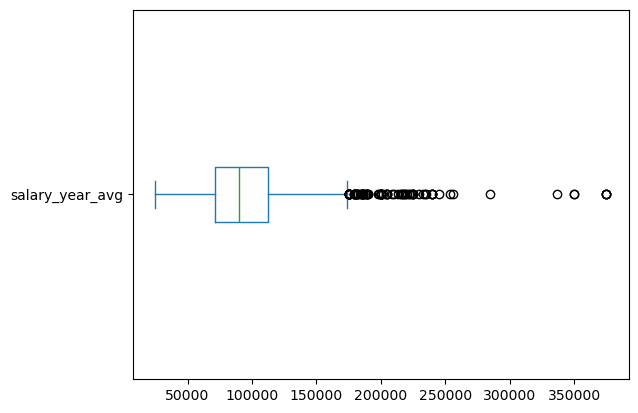

In [24]:
df_da['salary_year_avg'].plot(kind='box',vert=False)

In [ ]:
job_titles =['Data Analyst','Data Scientist','Data Engineer']


df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()

df_us = df_us.dropna(subset=['salary_year_avg'])

job_list =[df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

df_us.boxplot(column='salary_year_avg', by='job_title_short', vert=False)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary (Yearly Average)')
plt.ylabel('Job Title')
plt.suptitle('')  # Removes the automatic "Boxplot grouped by ..."
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab5113cb00>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab5113d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab5113ca10>,
 'medians': [<matplotlib.lines.Line2D at 0x1ab5113d7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ab5113dac0>,
 'means': []}

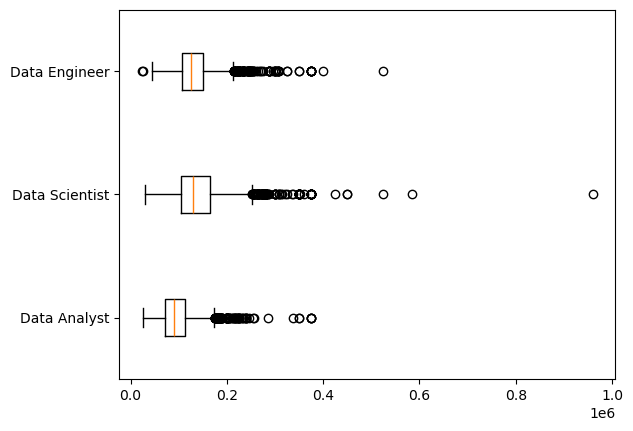

In [41]:
plt.boxplot(job_list, labels=job_titles, vert=False)